/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Deep RNN Test Accuracy: 73.50%
Bi-RNN Test Accuracy: 98.00%


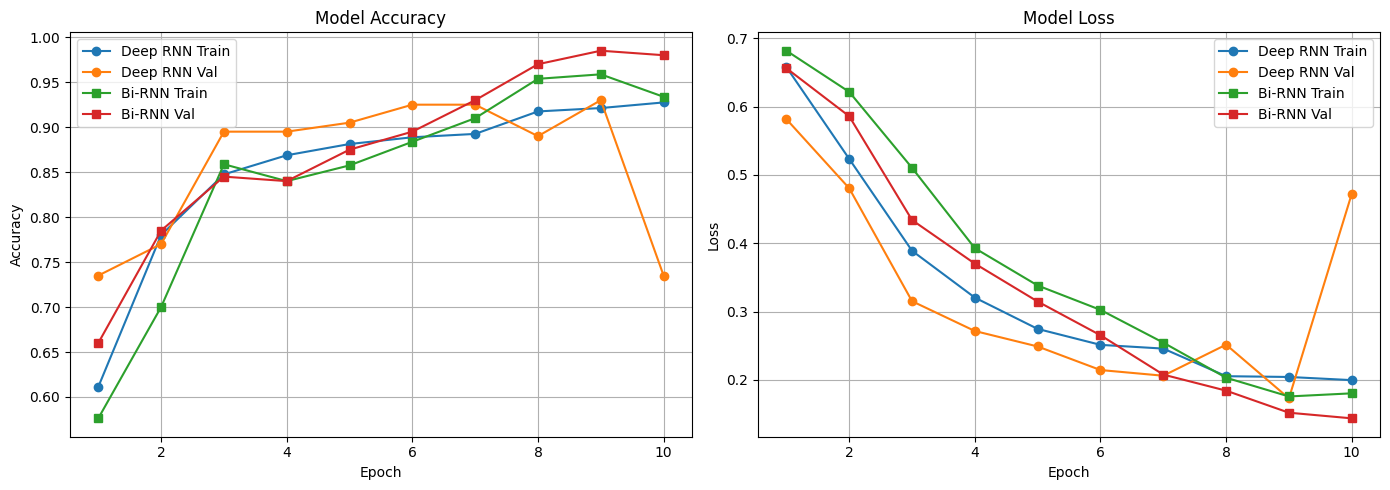

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Bidirectional
from tensorflow.keras.utils import to_categorical

# Function to create synthetic sequence classification dataset
def generate_sequence_data(num_samples=1000, sequence_length=10):
    X = np.random.rand(num_samples, sequence_length, 1)
    y = (X.mean(axis=1) > 0.5).astype(int).flatten()
    return X, to_categorical(y, 2)

# Generate and split dataset
X, y = generate_sequence_data()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ----- Deep RNN -----
deep_rnn = Sequential([
    SimpleRNN(32, return_sequences=True, activation='tanh', input_shape=(10, 1)),
    SimpleRNN(16, activation='tanh'),
    Dense(2, activation='softmax')
])

deep_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_deep = deep_rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# ----- Bi-RNN -----
bi_rnn = Sequential([
    Bidirectional(SimpleRNN(16, activation='tanh'), input_shape=(10, 1)),
    Dense(2, activation='softmax')
])

bi_rnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history_bi = bi_rnn.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), verbose=0)

# ----- Evaluation -----
loss_deep, acc_deep = deep_rnn.evaluate(X_test, y_test, verbose=0)
loss_bi, acc_bi = bi_rnn.evaluate(X_test, y_test, verbose=0)

print(f"Deep RNN Test Accuracy: {acc_deep * 100:.2f}%")
print(f"Bi-RNN Test Accuracy: {acc_bi * 100:.2f}%")

# ----- Visualization -----
epochs = range(1, 11)

plt.figure(figsize=(14, 5))

# Accuracy Comparison
plt.subplot(1, 2, 1)
plt.plot(epochs, history_deep.history['accuracy'], label='Deep RNN Train', marker='o')
plt.plot(epochs, history_deep.history['val_accuracy'], label='Deep RNN Val', marker='o')
plt.plot(epochs, history_bi.history['accuracy'], label='Bi-RNN Train', marker='s')
plt.plot(epochs, history_bi.history['val_accuracy'], label='Bi-RNN Val', marker='s')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Loss Comparison
plt.subplot(1, 2, 2)
plt.plot(epochs, history_deep.history['loss'], label='Deep RNN Train', marker='o')
plt.plot(epochs, history_deep.history['val_loss'], label='Deep RNN Val', marker='o')
plt.plot(epochs, history_bi.history['loss'], label='Bi-RNN Train', marker='s')
plt.plot(epochs, history_bi.history['val_loss'], label='Bi-RNN Val', marker='s')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()
